In [28]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import files
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [9]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df =application_df.drop (['EIN','NAME'], axis=1)

In [10]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [11]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
unique_counts = application_df.nunique().sort_values()
unique_counts

STATUS                       2
SPECIAL_CONSIDERATIONS       2
IS_SUCCESSFUL                2
ORGANIZATION                 4
USE_CASE                     5
AFFILIATION                  6
INCOME_AMT                   9
APPLICATION_TYPE            17
CLASSIFICATION              71
ASK_AMT                   8747
dtype: int64

In [12]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
v_counts = application_df['APPLICATION_TYPE'].value_counts()
v_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
cutoff_value = 777
classifications_to_replace = []

# Get the value counts of each classification
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Create a list of classifications to be replaced
for cls, count in classification_counts.items():
    if count < cutoff_value:
        classifications_to_replace.append(cls)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

<ipython-input-17-7f087bf3f0d9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(['IS_SUCCESSFUL'],1).values


In [18]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T12', 'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T14',
       'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17', 'APPLICATION_TYPE_T19',
       'APPLICATION_TYPE_T2', 'APPLICATION_TYPE_T25', 'APPLICATION_TYPE_T29',
       'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'APPLICATION_TYPE_T9', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1= 120
hidden_nodes_layer2 = 85

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="LeakyReLU"))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="ReLU"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               6360      
                                                                 
 dense_1 (Dense)             (None, 85)                10285     
                                                                 
 dense_2 (Dense)             (None, 1)                 86        
                                                                 
Total params: 16,731
Trainable params: 16,731
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 5ms/step - loss: 0.7555 - accuracy: 0.7030
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 0.6728 - accuracy: 0.7133
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.6418 - accuracy: 0.7198
Epoch 4/100
804/804 [==============================] - 5s 6ms/step - loss: 0.6454 - accuracy: 0.7218
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.6066 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.6002 - accuracy: 0.7261
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6004 - accuracy: 0.7270
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5854 - accuracy: 0.7280
Epoch 9/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5859 - accuracy: 0.7248
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5706 - accura

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5668 - accuracy: 0.7254 - 660ms/epoch - 2ms/step
Loss: 0.5668472051620483, Accuracy: 0.7253644466400146


In [24]:
#Create a Dataframe with training history
train_df = pd.DataFrame(fit_model.history)
train_df.head()

,loss,accuracy
0,0.755547,0.702962
1,0.672753,0.713342
2,0.641803,0.719834
3,0.645412,0.721777
4,0.606644,0.729358


<Axes: >

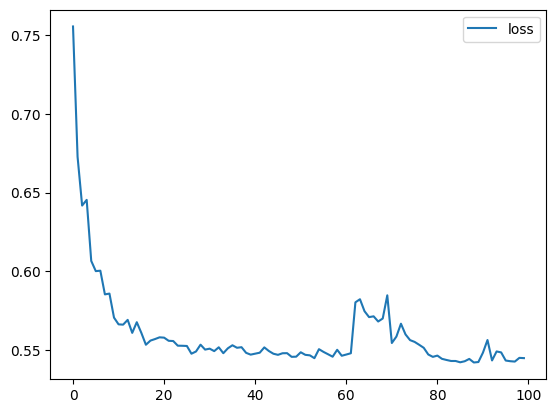

In [25]:
#Plotting the loss
train_df.plot(y="loss")

<Axes: >

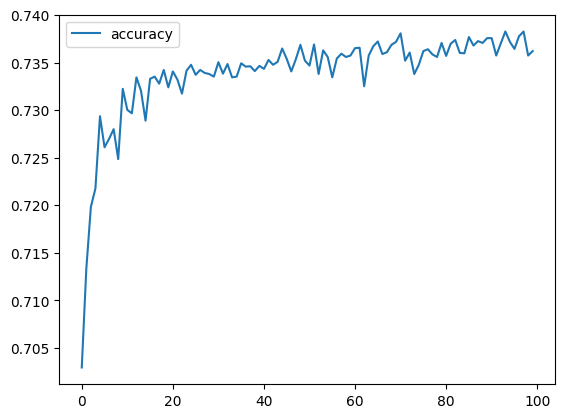

In [26]:
#Plotting the accuracy
train_df.plot(y="accuracy")

In [29]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save('AlphabetSoupcharity.hdf5')
files.download('AlphabetSoupcharity.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>